# **Course 3 Automatidata project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [3]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
df.size

408582

In [5]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


And info. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [7]:
# Convert data columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

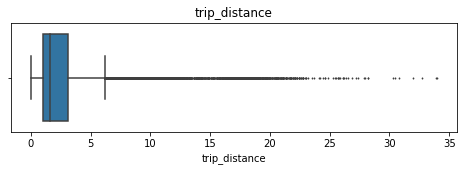

In [8]:
# Create box plot of trip_distance
plt.figure(figsize=(8,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

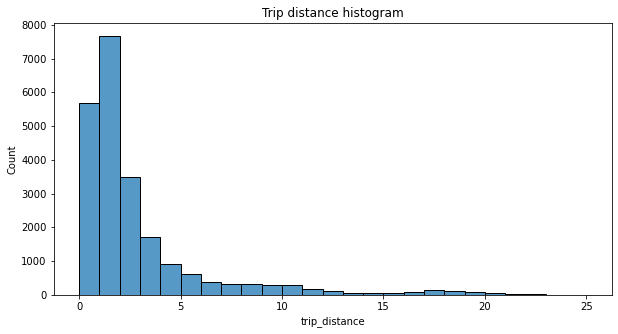

In [9]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

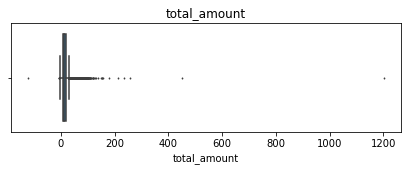

In [10]:
# Create box plot of total_amount
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

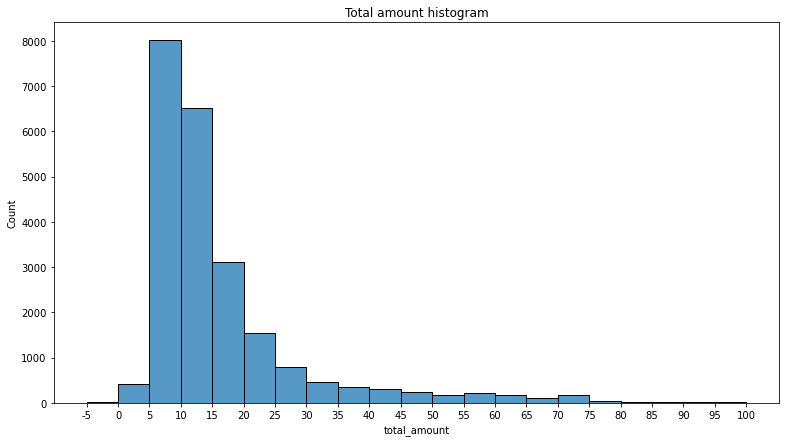

In [11]:
# Create histogram of total_amount
plt.figure(figsize=(13,7))
plot = sns.histplot(df['total_amount'], bins=range(-5,105,5))
plot.set_xticks(range(-5,105,5))
plot.set_xticklabels(range(-5,105,5))
plt.title('Total amount histogram');

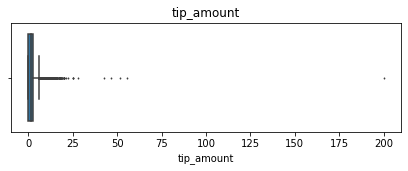

In [12]:
# Create box plot of tip_amount
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=1);

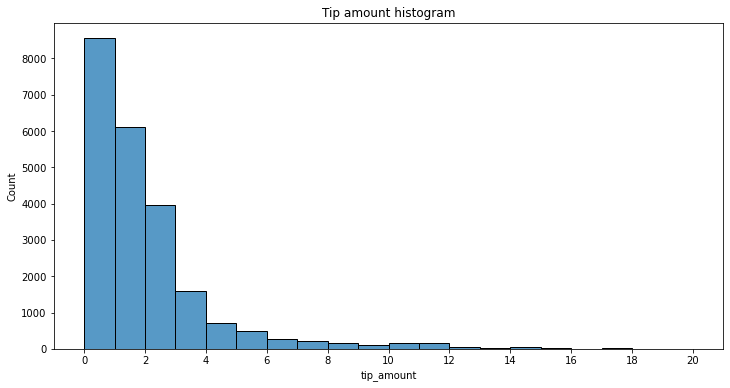

In [13]:
# Create histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

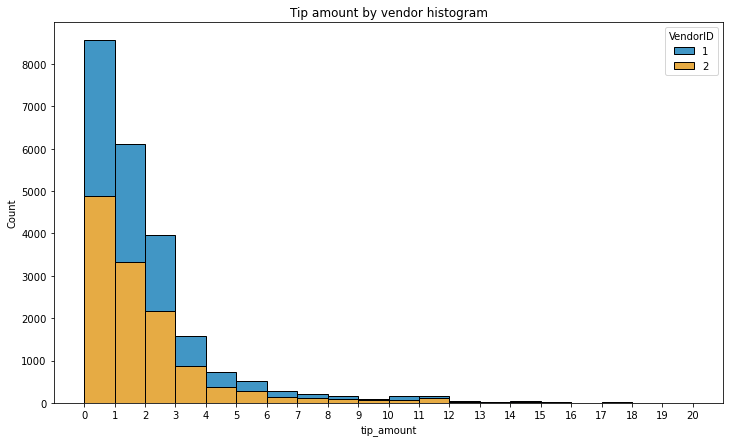

In [14]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='colorblind')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

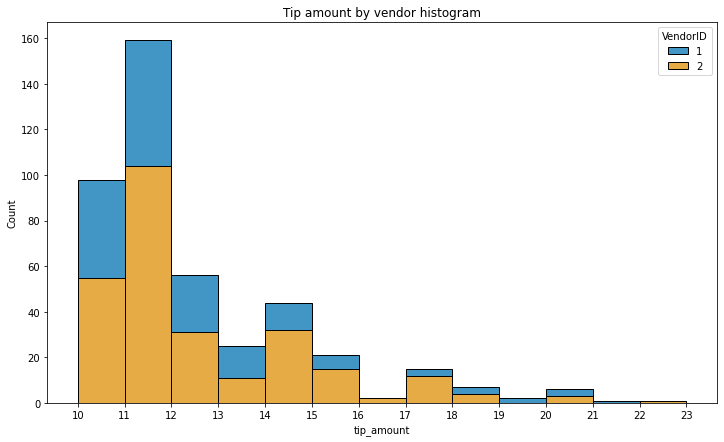

In [15]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] > 10]

plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,24,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='colorblind')
ax.set_xticks(range(10,24,1))
ax.set_xticklabels(range(10,24,1))
plt.title('Tip amount by vendor histogram');

In [16]:
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

In [17]:
# Calculate mean tips by passenger_count
df[['passenger_count', 'tip_amount']].groupby('passenger_count').mean()

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


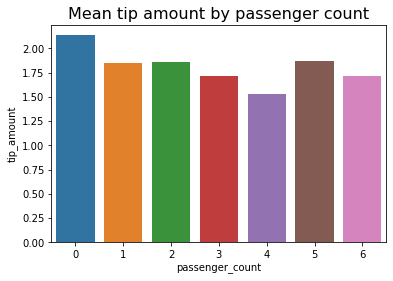

In [18]:
# Create bar plot for mean tips by passenger count
pass_mt = df[['passenger_count', 'tip_amount']].groupby('passenger_count').mean().reset_index(0)

sns.barplot(pass_mt['passenger_count'], pass_mt['tip_amount'])
plt.title('Mean tip amount by passenger count', fontsize=16);

In [19]:
# Create a month column
df['ride_month'] = df['tpep_pickup_datetime'].dt.month_name()

# Create a day column
df['ride_day'] = df['tpep_pickup_datetime'].dt.day_name()

In [20]:
# df.groupby('ride_month').count() or 
monthly_rides = df[['ride_month', 'VendorID']].groupby('ride_month').count()
monthly_rides

,VendorID
ride_month,
April,2019
August,1724
December,1863
February,1769
January,1997
July,1697
June,1964
March,2049
May,2013


In [21]:
# Reorder the monthly ride list so months go in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=months)
monthly_rides

,VendorID
ride_month,
January,1997
February,1769
March,2049
April,2019
May,2013
June,1964
July,1697
August,1724
September,1734


In [22]:
# Show the index
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='ride_month')

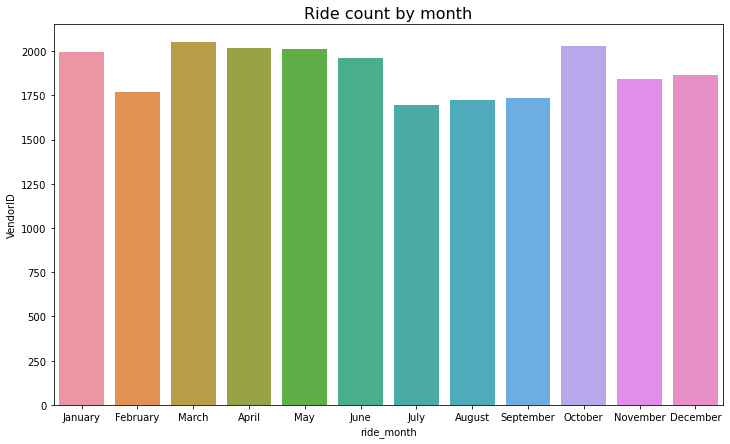

In [23]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(monthly_rides.index, monthly_rides['VendorID'])
ax.set_xticklabels(monthly_rides.index)
plt.title('Ride count by month', fontsize=16);

In [24]:
# Repeat the above process, this time for rides by day
daily_rides = df[['ride_day', 'VendorID']].groupby('ride_day').count()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=days)
daily_rides

,VendorID
ride_day,
Monday,2931
Tuesday,3198
Wednesday,3390
Thursday,3402
Friday,3413
Saturday,3367
Sunday,2998


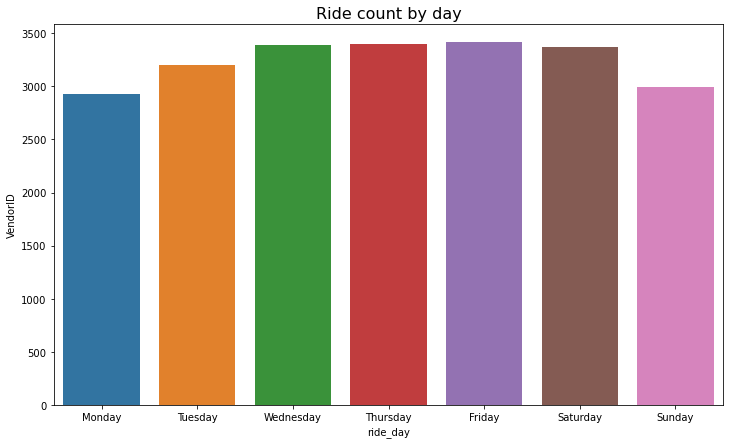

In [25]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(daily_rides.index, daily_rides['VendorID'])
ax.set_xticklabels(daily_rides.index)
plt.title('Ride count by day', fontsize=16);

In [26]:
# Repeat the process, this time for total revenue by day
daily_revenue = df[['ride_day', 'total_amount']].groupby('ride_day').sum()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_revenue = daily_revenue.reindex(index=days)
daily_revenue

,total_amount
ride_day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


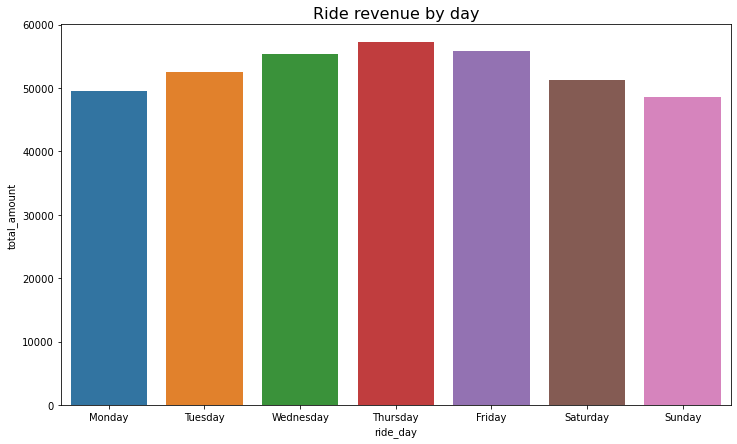

In [27]:
plt.figure(figsize=(12,7))
ax = sns.barplot(daily_revenue.index, daily_revenue['total_amount'])
ax.set_xticklabels(daily_revenue.index)
plt.title('Ride revenue by day', fontsize=16);

In [28]:
# Repeat the process, this time for total revenue by month
monthly_revenue = df[['ride_month', 'total_amount']].groupby('ride_month').sum()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_revenue = monthly_revenue.reindex(index=months)
monthly_revenue

,total_amount
ride_month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


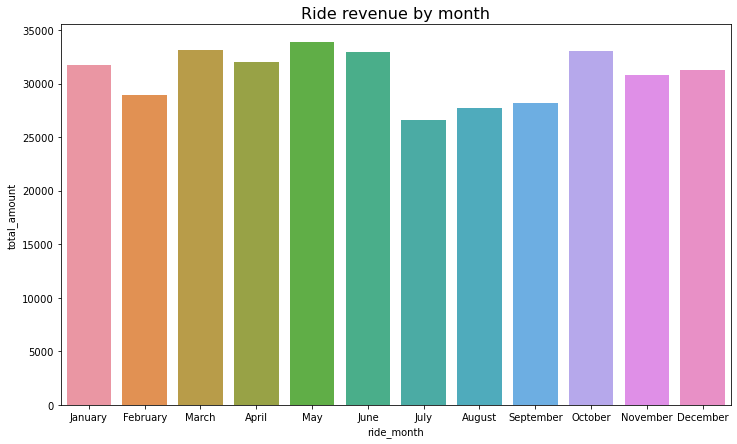

In [29]:
plt.figure(figsize=(12,7))
ax = sns.barplot(monthly_revenue.index, monthly_revenue['total_amount'])
ax.set_xticklabels(monthly_revenue.index)
plt.title('Ride revenue by month', fontsize=16);

**Plot mean trip distance by drop-off location**

In [30]:
# Get number of unique drop-off location IDs
UniqueDropOffIDs = df['DOLocationID'].unique()
UniqueDropOffIDs.size

216

In [31]:
# Calculate the mean trip distance for each drop-off location
DropOffMeanTripDist = df[['trip_distance','DOLocationID']].groupby('DOLocationID').mean()
DropOffMeanTripDist = DropOffMeanTripDist.sort_values(by= 'trip_distance', ascending=True)

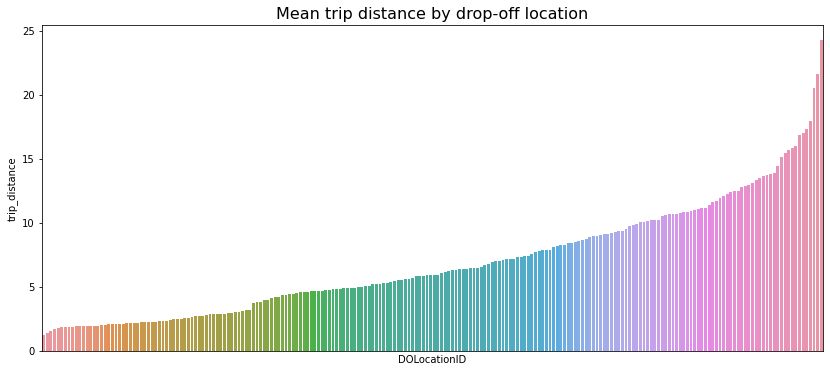

In [32]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
plot = sns.barplot(x=DropOffMeanTripDist.index, 
                 y=DropOffMeanTripDist['trip_distance'],
                 order=DropOffMeanTripDist.index)
plot.set_xticklabels([])
plot.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

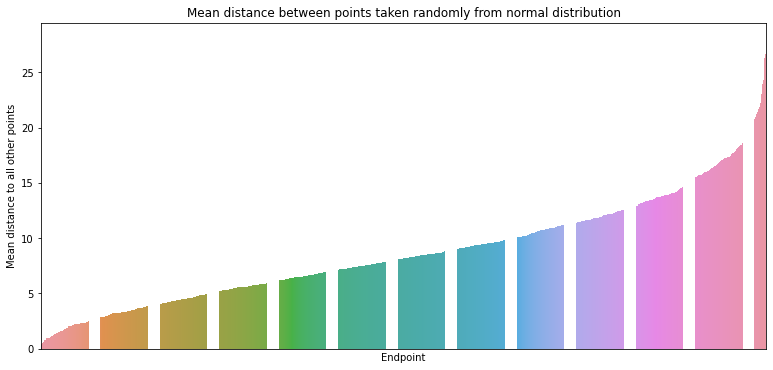

In [33]:
# 1. Generate random points on a 2D plane from a normal distribution
rand = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midpoint = int(len(rand)/2)  # Calculate midpoint of the array of coordinates
start = rand[:midpoint]      # Isolate first half of array ("pick-up locations")
end = rand[midpoint:]        # Isolate second half of array ("drop-off locations")

# 2. Calculate Euclidean distances between points in first half and second half of array
distances = (start - end)**2           
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)

# 3. Group the coordinates by "drop-off location", compute mean distance
df2 = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
                   'end': [tuple(x) for x in end.tolist()],
                   'distance': distances})
data = df2[['end', 'distance']].groupby('end').mean()
data = data.sort_values(by='distance')

# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to
plt.figure(figsize=(13,6))
plot = sns.barplot(x=data.index,
                 y=data['distance'],
                 order=data.index)
plot.set_xticklabels([])
plot.set_xticks([])
plot.set_xlabel('Endpoint')
plot.set_ylabel('Mean distance to all other points')
plot.set_title('Mean distance between points taken randomly from normal distribution');

In [34]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

49

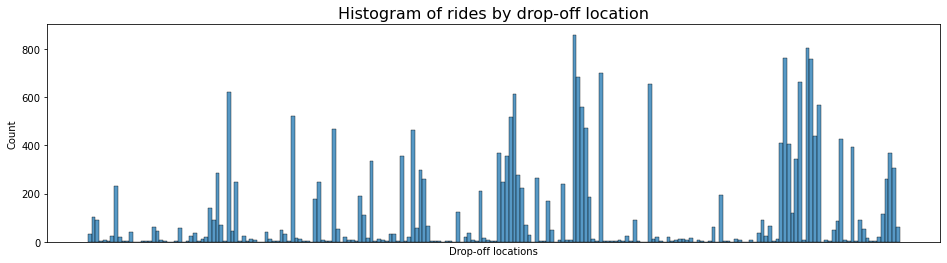

In [35]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);